## Importinig libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
%matplotlib inline

## Loading trainset and testset

In [2]:
dataset = pd.read_csv('./train.csv')
dtest=pd.read_csv('./test.csv')

In [3]:
dataset.shape
dtest.shape

(154235, 16)

In [4]:
dataset.describe()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048573e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048573e+06,1.048573e+06
mean,5.242870e+05,1.541465e+00,1.648085e+02,1.626675e+02,1.895219e+00,4.974875e-01,2.859832e+00,1.590696e+00,3.458530e-01,1.317943e+00,1.043368e+00,3.415165e-01,2.999187e-01,1.622721e+01
std,3.026977e+05,4.982779e-01,6.579282e+01,6.953073e+01,2.653937e+00,3.535421e-02,3.709541e+00,1.253700e+00,2.138421e+00,4.853266e-01,5.621114e-01,4.837718e-01,4.936538e-03,1.508592e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.000000e+00,1.250000e+02,1.130000e+02,0.000000e+00,5.000000e-01,9.300000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,5.242870e+05,2.000000e+00,1.620000e+02,1.620000e+02,1.450000e+00,5.000000e-01,1.600000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,7.864305e+05,2.000000e+00,2.330000e+02,2.330000e+02,2.450000e+00,5.000000e-01,2.900000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,3.000000e-01,1.775000e+01
max,1.048574e+06,2.000000e+00,2.650000e+02,2.650000e+02,4.000000e+02,5.000000e-01,1.138000e+02,9.000000e+00,9.057600e+02,4.000000e+00,9.900000e+01,6.500000e+00,3.000000e-01,2.759370e+03


In [5]:
dtest.describe()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,extra_charges,improvement_charge
count,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000,154235.000000
mean,77117.000000,1.541673,164.625597,162.889513,1.905959,0.497183,2.879878,1.589004,0.352751,1.317217,1.041119,0.341815,0.299689
std,44523.953722,0.498262,65.800204,69.574927,2.705345,0.039736,3.736699,1.254660,1.603057,0.484586,0.383277,0.488037,0.012824
min,0.000000,1.000000,1.000000,1.000000,-2.020000,-0.500000,0.000000,0.000000,-0.010000,1.000000,1.000000,-4.500000,-0.300000
25%,38558.500000,1.000000,125.000000,113.000000,0.000000,0.500000,0.940000,1.000000,0.000000,1.000000,1.000000,0.000000,0.300000
50%,77117.000000,2.000000,162.000000,162.000000,1.450000,0.500000,1.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.300000
75%,115675.500000,2.000000,233.000000,234.000000,2.460000,0.500000,2.910000,2.000000,0.000000,2.000000,1.000000,0.500000,0.300000
max,154234.000000,2.000000,265.000000,265.000000,250.000000,0.500000,117.000000,6.000000,95.760000,4.000000,99.000000,4.500000,0.300000


In [6]:
#Checking for null values in trainset
dataset.isnull().any()

ID                        False
vendor+AF8-id              True
pickup+AF8-loc             True
drop+AF8-loc               True
driver+AF8-tip             True
mta+AF8-tax                True
distance                   True
pickup+AF8-time            True
drop+AF8-time              True
num+AF8-passengers         True
toll+AF8-amount            True
payment+AF8-method         True
rate+AF8-code              True
stored+AF8-flag            True
extra+AF8-charges          True
improvement+AF8-charge     True
total+AF8-amount           True
dtype: bool

In [7]:
#Checking for null values in testset
dtest.isnull().any()

ID                    False
vendor_id             False
pickup_loc            False
drop_loc              False
driver_tip            False
mta_tax               False
distance              False
pickup_time           False
drop_time             False
num_passengers        False
toll_amount           False
payment_method        False
rate_code             False
stored_flag           False
extra_charges         False
improvement_charge    False
dtype: bool

In [8]:
#Filling null with preciding values and handling of non numeric trainset
dataset = dataset.fillna(method='ffill')
dataset['stored+AF8-flag']=label_encoder.fit_transform(dataset['stored+AF8-flag'])
dataset['stored+AF8-flag'].unique()

array([0, 1])

In [9]:
#Filling null with preciding values and handling of non numeric testset
dtest = dtest.fillna(method='ffill')
dtest['stored_flag']=label_encoder.fit_transform(dtest['stored_flag'])
dtest['stored_flag'].unique()

array([0, 1])

In [10]:
#converting date to datetime
dataset['pickup+AF8-time']= pd.to_datetime(dataset['pickup+AF8-time'])
dataset['drop+AF8-time']= pd.to_datetime(dataset['drop+AF8-time']) 
dtest['pickup_time']= pd.to_datetime(dtest['pickup_time'])
dtest['drop_time']= pd.to_datetime(dtest['drop_time'])

In [11]:
#Finding duration between droptime and picktime
dataset['duration']=dataset['drop+AF8-time'].sub(dataset['pickup+AF8-time'], axis=0)
dtest['duration']=dtest['drop_time'].sub(dtest['pickup_time'], axis=0)

In [12]:
#Converting time in second
dataset['duration']=dataset['duration'].dt.total_seconds()
dtest['duration']=dtest['duration'].dt.total_seconds()

In [13]:
#Checking again for null values
dataset.isnull().any()

ID                        False
vendor+AF8-id             False
pickup+AF8-loc            False
drop+AF8-loc              False
driver+AF8-tip            False
mta+AF8-tax               False
distance                  False
pickup+AF8-time           False
drop+AF8-time             False
num+AF8-passengers        False
toll+AF8-amount           False
payment+AF8-method        False
rate+AF8-code             False
stored+AF8-flag           False
extra+AF8-charges         False
improvement+AF8-charge    False
total+AF8-amount          False
duration                  False
dtype: bool

In [14]:
#Checking again for null values
dtest.isnull().any()

ID                    False
vendor_id             False
pickup_loc            False
drop_loc              False
driver_tip            False
mta_tax               False
distance              False
pickup_time           False
drop_time             False
num_passengers        False
toll_amount           False
payment_method        False
rate_code             False
stored_flag           False
extra_charges         False
improvement_charge    False
duration              False
dtype: bool

In [15]:
#dropping unnecessary column in train dataset
X_train = dataset[['ID','vendor+AF8-id','pickup+AF8-loc','drop+AF8-loc','driver+AF8-tip','mta+AF8-tax','distance','num+AF8-passengers','toll+AF8-amount','payment+AF8-method','rate+AF8-code','stored+AF8-flag','extra+AF8-charges','improvement+AF8-charge','duration']].values
Y_train = dataset['total+AF8-amount'].values

In [16]:
#dropping unnecessary column in test dataset
X_test = dtest[['ID','vendor_id','pickup_loc','drop_loc','driver_tip','mta_tax','distance','num_passengers','toll_amount','payment_method','rate_code','stored_flag','extra_charges','improvement_charge','duration']].values
X_test

array([[0.00000e+00, 1.00000e+00, 6.80000e+01, ..., 5.00000e-01,
        3.00000e-01, 2.57000e+02],
       [1.00000e+00, 1.00000e+00, 1.70000e+02, ..., 0.00000e+00,
        3.00000e-01, 1.11300e+03],
       [2.00000e+00, 2.00000e+00, 1.30000e+01, ..., 0.00000e+00,
        3.00000e-01, 8.92000e+02],
       ...,
       [1.54232e+05, 2.00000e+00, 2.39000e+02, ..., 1.00000e+00,
        3.00000e-01, 2.85000e+02],
       [1.54233e+05, 1.00000e+00, 2.49000e+02, ..., 0.00000e+00,
        3.00000e-01, 8.02000e+02],
       [1.54234e+05, 2.00000e+00, 1.61000e+02, ..., 1.00000e+00,
        3.00000e-01, 1.01400e+03]])

In [17]:
dataset

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,duration
0,0,1.0,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,321.0
1,1,2.0,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,990.0
2,2,2.0,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,0,0.0,0.3,8.80,377.0
3,3,2.0,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,0,0.0,0.3,14.80,968.0
4,4,2.0,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,0,0.0,0.3,4.80,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1.0,48.0,50.0,1.00,0.5,1.40,2017-04-06 23:17:09,2017-04-06 23:25:04,1.0,0.0,1.0,1.0,0,0.5,0.3,9.80,475.0
1048571,1048571,1.0,237.0,166.0,0.00,0.5,3.60,2017-04-06 10:58:47,2017-04-06 11:22:04,1.0,0.0,2.0,1.0,0,0.0,0.3,18.30,1397.0
1048572,1048572,1.0,164.0,90.0,2.35,0.5,1.70,2017-04-06 22:03:42,2017-04-06 22:17:04,1.0,0.0,1.0,1.0,0,0.5,0.3,14.15,802.0
1048573,1048573,2.0,264.0,264.0,0.00,0.5,1.80,2017-04-06 18:43:22,2017-04-06 18:56:09,4.0,0.0,2.0,1.0,0,1.0,0.3,11.80,767.0


In [18]:
dtest

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,duration
0,0,1,68.0,186.0,1.00,0.5,0.70,2017-04-05 05:49:46,2017-04-05 05:54:03,1.0,0.0,1.0,1.0,0,0.5,0.3,257.0
1,1,1,170.0,161.0,2.55,0.5,1.00,2017-04-07 08:57:27,2017-04-07 09:16:00,1.0,0.0,1.0,1.0,0,0.0,0.3,1113.0
2,2,2,13.0,246.0,2.96,0.5,3.35,2017-04-06 08:06:41,2017-04-06 08:21:33,2.0,0.0,1.0,1.0,0,0.0,0.3,892.0
3,3,1,170.0,233.0,2.00,0.5,0.80,2017-04-04 08:31:34,2017-04-04 08:37:21,2.0,0.0,1.0,1.0,0,0.0,0.3,347.0
4,4,1,237.0,236.0,1.00,0.5,0.70,2017-04-07 10:54:06,2017-04-07 11:00:59,1.0,0.0,1.0,1.0,1,0.0,0.3,413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154230,154230,2,234.0,161.0,2.56,0.5,1.47,2017-04-05 19:17:29,2017-04-05 19:33:29,6.0,0.0,1.0,1.0,0,1.0,0.3,960.0
154231,154231,1,141.0,236.0,1.00,0.5,1.10,2017-04-05 13:02:10,2017-04-05 13:09:10,2.0,0.0,1.0,1.0,0,0.0,0.3,420.0
154232,154232,2,239.0,151.0,1.56,0.5,1.26,2017-04-06 19:53:28,2017-04-06 19:58:13,1.0,0.0,1.0,1.0,0,1.0,0.3,285.0
154233,154233,1,249.0,13.0,2.45,0.5,2.20,2017-04-03 10:52:58,2017-04-03 11:06:20,1.0,0.0,1.0,1.0,0,0.0,0.3,802.0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

In [20]:
X_test.shape

(154235, 15)

## Applying Linear Regression

In [21]:
regressor = LinearRegression(normalize=True)  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
#predicting
y_pred = regressor.predict(x_test)
Y_test = regressor.predict(X_test)

In [24]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df1.head(25)

In [25]:
#df1

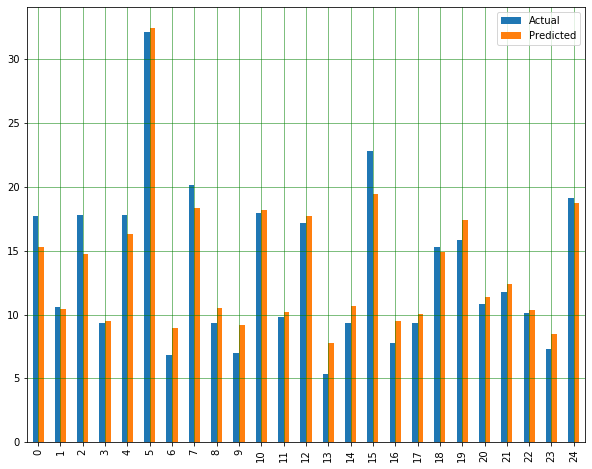

In [26]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9830205508332623
Mean Squared Error: 28.606393735372084
Root Mean Squared Error: 5.34849452980669


In [28]:
Y_test=pd.DataFrame(Y_test)
print(Y_test)

                0
0        8.701479
1       11.654226
2       18.036320
3       10.297546
4        8.934900
...           ...
154230  13.409633
154231   9.513191
154232  11.275727
154233  14.371540
154234  14.057684

[154235 rows x 1 columns]


In [29]:
export_csv = Y_test.to_csv ('./Ytest.csv', index = True, header=True)